In [1]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier


In [2]:
# Reading Train Dataset from Local Drive
from google.colab import files
uploaded = files.upload()

Saving Phishing_TrainSet.csv to Phishing_TrainSet (4).csv


In [3]:
# Reading Train Dataset from Local Drive
from google.colab import files
uploaded = files.upload()

Saving Phishing_TestSet.csv to Phishing_TestSet (4).csv


In [4]:
train = pd.read_csv("Phishing_TrainSet.csv")
test = pd.read_csv("Phishing_TestSet.csv")


In [5]:
train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,1,1,1,1,1,1,-1,-1,-1,1,1,1,1,1,-1,1,0,-1,1,-1,-1,1,-1,1,1,1,1,-1,1
1,-1,1,-1,1,-1,1,1,1,-1,1,1,-1,1,0,0,1,1,-1,1,1,1,1,1,1,-1,1,-1,1,1,1,1
2,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1
3,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1
4,1,-1,1,1,1,1,0,-1,1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,1,1


In [6]:
test.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,-1
1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,0,1,1,-1,1,1,1,0,-1,1,0,1,-1
2,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,-1,0,1,-1
3,-1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,1,1,1,-1
4,-1,-1,1,1,1,-1,-1,0,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,-1


In [7]:
print(train.shape)
print(test.shape)

(8843, 31)
(2212, 31)


In [8]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,8843.0,0.321271,0.947041,-1.0,-1.0,1.0,1.0,1.0
URL_Length,8843.0,-0.629764,0.769076,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,8843.0,0.736289,0.676706,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,8843.0,0.686306,0.727354,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,8843.0,0.740360,0.672249,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,8843.0,-0.735384,0.677689,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,8843.0,0.104942,0.809817,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,8843.0,0.255343,0.911451,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,8843.0,-0.340948,0.940135,-1.0,-1.0,-1.0,1.0,1.0
Favicon,8843.0,0.629990,0.776647,-1.0,1.0,1.0,1.0,1.0


In [9]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,2212.0,0.283906,0.959069,-1.0,-1.0,1.0,1.0,1.0
URL_Length,2212.0,-0.646926,0.754078,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,2212.0,0.748644,0.663122,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,2212.0,0.757685,0.652768,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,2212.0,0.745931,0.666174,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,2212.0,-0.733273,0.680088,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,2212.0,-0.099910,0.827752,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,2212.0,0.233273,0.913646,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,2212.0,-0.320072,0.947607,-1.0,-1.0,-1.0,1.0,1.0
Favicon,2212.0,0.622966,0.782426,-1.0,1.0,1.0,1.0,1.0


In [10]:
print("missing values in train set: \n", train.isnull().sum())
print("\nmissing values in test set: \n", test.isnull().sum())

missing values in train set: 
 having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_

In [11]:
X_train = train.drop(columns='Result')
X_train.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,1,1,1,1,1,1,-1,-1,-1,1,1,1,1,1,-1,1,0,-1,1,-1,-1,1,-1,1,1,1,1,-1
1,-1,1,-1,1,-1,1,1,1,-1,1,1,-1,1,0,0,1,1,-1,1,1,1,1,1,1,-1,1,-1,1,1,1
2,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1
3,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1
4,1,-1,1,1,1,1,0,-1,1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,1


In [12]:
y_train=train['Result']
y_train=pd.DataFrame(y_train)
y_train.head

<bound method NDFrame.head of       Result
0          1
1          1
2          1
3          1
4          1
...      ...
8838      -1
8839      -1
8840      -1
8841      -1
8842      -1

[8843 rows x 1 columns]>

In [13]:
X_test = test.drop(columns='Result')
X_test.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1
1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,0,1,1,-1,1,1,1,0,-1,1,0,1
2,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,-1,0,1
3,-1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,-1,-1,-1,1,1,0,1,1,1,1,1,1,0,-1,1,1,1
4,-1,-1,1,1,1,-1,-1,0,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1


In [14]:
y_test=test['Result']
y_test=pd.DataFrame(y_test)
y_test.head

<bound method NDFrame.head of       Result
0         -1
1         -1
2         -1
3         -1
4         -1
...      ...
2207       1
2208       1
2209       1
2210       1
2211       1

[2212 rows x 1 columns]>

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8843, 30)
(2212, 30)
(8843, 1)
(2212, 1)


In [16]:
# mlp = MLPClassifier()
mlp = MLPClassifier(hidden_layer_sizes=(250, 150), activation='relu', solver='adam', max_iter=500)
# mlp = MLPClassifier(hidden_layer_sizes=(250, 150), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [17]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print("Accuracy Score of MLP on Training Dataset - ", accuracy_score(y_train,predict_train))
print("\nConfusion Matrix of MLP on Training Dataset - \n", confusion_matrix(y_train,predict_train))
print("\nClassification Report of MLP on Training Dataset - \n", classification_report(y_train,predict_train))

Accuracy Score of MLP on Training Dataset -  0.988239285310415

Confusion Matrix of MLP on Training Dataset - 
 [[3880   38]
 [  66 4859]]

Classification Report of MLP on Training Dataset - 
               precision    recall  f1-score   support

          -1       0.98      0.99      0.99      3918
           1       0.99      0.99      0.99      4925

    accuracy                           0.99      8843
   macro avg       0.99      0.99      0.99      8843
weighted avg       0.99      0.99      0.99      8843



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# for encoding

Text(0.5, 1.0, 'Confusion Matrix of Training Set')

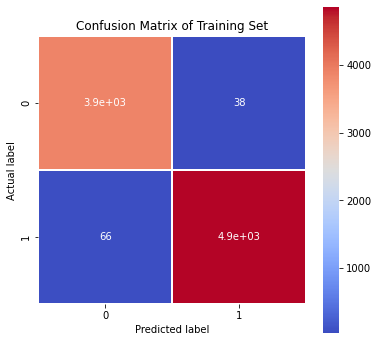

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(data=confusion_matrix(y_train,predict_train),linewidths=.5, annot=True,square = True,  cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Training Set')

In [20]:
print("Accuracy Score of MLP on Test Dataset - ", accuracy_score(y_test,predict_test))
print("\nConfusion Matrix of MLP on Test Dataset - \n", confusion_matrix(y_test,predict_test))
print("\nClassification Report of MLP on Test Dataset - \n", classification_report(y_test,predict_test))

Accuracy Score of MLP on Test Dataset -  0.9471066907775768

Confusion Matrix of MLP on Test Dataset - 
 [[ 895   85]
 [  32 1200]]

Classification Report of MLP on Test Dataset - 
               precision    recall  f1-score   support

          -1       0.97      0.91      0.94       980
           1       0.93      0.97      0.95      1232

    accuracy                           0.95      2212
   macro avg       0.95      0.94      0.95      2212
weighted avg       0.95      0.95      0.95      2212



Text(0.5, 1.0, 'Confusion Matrix of Test set')

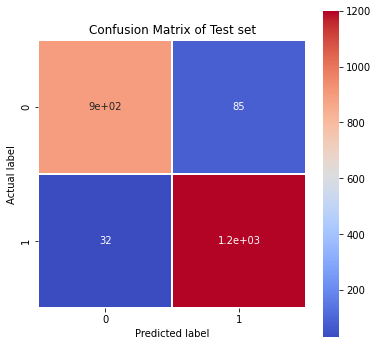

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(data=confusion_matrix(y_test,predict_test),linewidths=.5, annot=True,square = True,  cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix of Test set')